# Mini-Project - Outliers

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Mini-Project: Support Vector Machine  
Course: Data Science - Foundations II  
COD: ND111  
Date: 19/01/2019    

***

## Table of Contents
- [Introduction](#intro)
- [Given code 1](#code1)
- [Part I](#part_i)
    - [Exercise 1](#part_i_1)
    - [Exercise 2](#part_i_2)
- [Part II](#part_ii)
- [Given code 2](#code2)
    - [Exercise 1](#part_ii_1)
    - [Exercise 2](#part_ii_2)
    - [Exercise 3](#part_ii_3)
    - [Exercise 4](#part_ii_4)
    - [Exercise 5](#part_ii_5)
    - [Exercise 6](#part_ii_6)
    - [Exercise 7](#part_ii_7)
    
***

### General Information

This Jupyter Notebook (in Python 2) aims to create a reproducible archive.

## Introduction <a id='intro'></a>

This project has two parts. In the first part, you will run a regression, and identify and remove the 10% of points that have the largest residual errors. Then you’ll remove those outliers from the dataset and refit the regression, just like the strategy that Sebastian suggested in the lesson videos.

In the second part, you will get acquainted with some of the outliers in the Enron finance data, and learn if/how to remove them.

#### Given Code 1 <a id='code1'></a>

In [1]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.model_selection import train_test_split

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [2]:
# Import the library of linear model from Scikit Learn.
from sklearn.linear_model import LinearRegression

# Creating a Classifier
reg = LinearRegression()

# Fitting/Training the classifier.
reg.fit(ages_train, net_worths_train)

# Slope and Intercept
reg.coef_, reg.intercept_ 

(array([[5.07793064]]), array([25.21002155]))

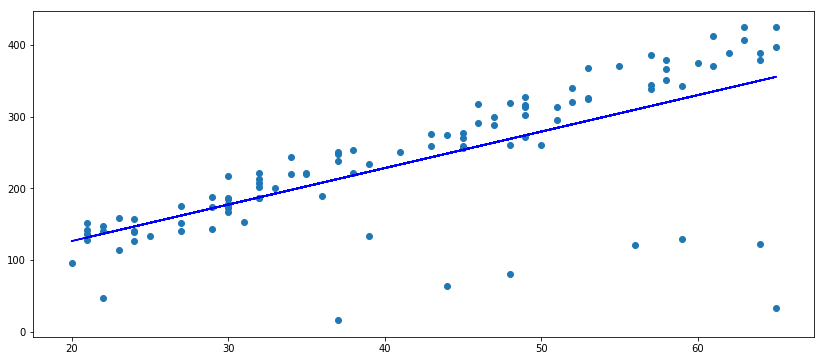

outlierCleaner() is returning an empty list, no refitting to be done


In [3]:
plt.figure(figsize = [14, 6])

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

## Part I

### Exercise 1 - Slope of Regression with Outliers <a id='part_i_1'></a>

Sebastian described to us an algorithm for improving a regression, which you will implement in this project. You will work through it in the next few quizzes. To summarize, what you'll do is fit the regression on all training points discard the 10% of points that have the largest errors between the actual y values, and the regression-predicted y values refit on the remaining points.

Start by running the starter code (outliers/outlier_removal_regression.py) and visualizing the points. A few outliers should clearly pop out. Deploy a linear regression, where net worth is the target and the feature being used to predict it is a person’s age (remember to train on the training data!).

The “correct” slope for the main body of data points is 6.25 (we know this because we used this value to generate the data)

>**What slope does your regression have?**

In [4]:
# Slope
reg.coef_

array([[5.07793064]])

### Exercise 2 - Score of Regression with Outliers <a id='part_i_2'></a>

>**What is the score you get when using your regression to make predictions with the test data?**

In [5]:
# Score using test dataset.
reg.score(ages_test, net_worths_test)

0.8782624703664671

## Part II

### Exercise 1 - Slope After Cleaning <a id='part_ii_1'></a>

In outliers/outlier_cleaner.py, you will find the skeleton for a function called outlierCleaner() that you will fill in with a cleaning algorithm. It takes three arguments: predictions is a list of predicted targets that come from your regression, ages is the list of ages in the training set, and net_worths is the actual value of the net worths in the training set. There should be 90 elements in each of these lists (because the training set has 90 points in it). Your job is to return a list called cleaned_data that has only 81 elements in it, which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81). The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error). 

Once this cleaning function is working, you should see the regression result changes. What is the new slope? Is it closer to the “correct” result of 6.25?

#### Given code 2  <a id='code2'></a>

In [6]:
#!/usr/bin/python

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    import pandas as pd

    # Calculating the errors
    error = net_worths - predictions

    # Squared errors
    error_2 = error * error

    # Creating a DataFrame to work with filters.
    df = pd.DataFrame(ages, columns = ['ages'])

    # Adding columns
    df['net_worths'] = net_worths
    df['r_2'] = error_2

    # Determine the threshold to cut the 10% of outliers.
    threshold = df.r_2.sort_values().iloc[[-10]]

    # Filtering using the threshold.
    cleaned_data = df[df.r_2 <= float(threshold)]

    # Returning the tuple.
    return zip(cleaned_data.ages, cleaned_data.net_worths, cleaned_data.r_2)

In [7]:
# Using the outlierCleaner to remove the outliers.
data_train_clean = outlierCleaner(reg.predict(ages_train), ages_train, net_worths_train)

# Unzipping the tuples.
ages_train_clean, net_worths_train_clean, _ = zip(*data_train_clean)

### Exercise 2 - Slope After Cleaning 1 <a id='part_ii_2'></a>

>**What is the new slope of your regression, now that the outliers have been cleaned away?**

In [8]:
# Creating a Classifier
reg_2 = LinearRegression()

# Fitting/Training the classifier.
reg_2.fit(zip(ages_train_clean),zip(net_worths_train_clean))

# Slope and Intercept
print "Slope:", reg_2.coef_[0][0]
print "Intercept:", reg.intercept_[0]

Slope: 6.368594806943665
Intercept: 25.21002154563587


### Exercise 3 - Score After Cleaning 2 <a id='part_ii_3'></a>

>**What’s the new score when you use the regression to make predictions on the test set?**

In [9]:
# Score using test dataset.
print "Score:", reg_2.score(ages_test, net_worths_test)

Score: 0.983189455395532


### Exercise 4 - Identify the Biggest Enron Outlier <a id='part_ii_4'></a>

In the mini-project for the regressions lesson, you used a regression to predict the bonuses for Enron employees. As you saw, even a single outlier can make a big difference on the regression result. There was something we didn’t tell you, though, which was that the dataset we had you use in that project had already been cleaned of some significant outliers. Identifying and cleaning away outliers is something you should always think about when looking at a dataset for the first time, and now you’ll get some hands-on experience with the Enron data.

You can find the starter code in outliers/enron_outliers.py, which reads in the data (in dictionary form) and converts it into a sklearn-ready numpy array. Since there are two features being extracted from the dictionary (“salary” and “bonus”), the resulting numpy array will be of dimension N x 2, where N is the number of data points and 2 is the number of features. This is perfect input for a scatterplot; we’ll use the matplotlib.pyplot module to make that plot. (We’ve been using pyplot for all the visualizations in this course.) Add these lines to the bottom of the script to make your scatterplot: 

```
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
```

In [10]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

There’s one outlier that should pop out to you immediately. Now the question is to identify the source. We found the original data source to be very helpful for this identification; you can find that PDF in final_project/enron61702insiderpay.pdf 
What’s the name of the dictionary key of this data point? (e.g. if this is Ken Lay, the answer would be “LAY KENNETH L”).

In [11]:
# Using the given code to plot.

def plot_graphic(data):
    """
    Plot a graphic using the data dataframe as input.
    
    data: salary and bonus.
    """
    plt.figure(figsize = [14,6])

    for point in data:
        salary = point[0]
        bonus = point[1]
        matplotlib.pyplot.scatter( salary, bonus )

    matplotlib.pyplot.xlabel("salary")
    matplotlib.pyplot.ylabel("bonus")
    matplotlib.pyplot.show()

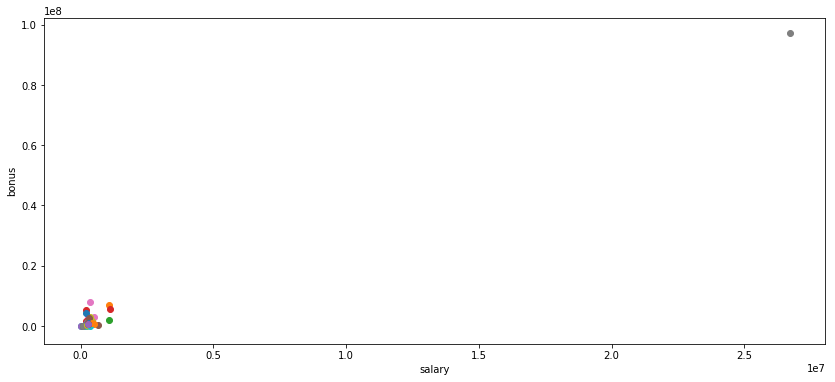

In [12]:
plot_graphic(data)

>**What is the dictionary key of the biggest Eron outlier?**

In [13]:
def df_keys_bonus_salary(data_dict):
    """
    I have create this function because I will use it twice.
    """
    # Initializing a list to store my desired info.
    list_of_interest = []

    # Loop to store the info in the list.
    for index in data_dict:
        list_of_interest.append([str(index), data_dict[index]['bonus'], data_dict[index]['salary']])

    # Importing pandas
    import pandas as pd

    # Converting to DataFrame.
    df_key_bonus = pd.DataFrame(list_of_interest, columns = ['keys','bonus', 'salary'])

    # Removing NaN values.
    df_key_bonus = df_key_bonus[df_key_bonus.bonus != 'NaN']

    # Ordering by bonus and printing the first 5 rows.
    return df_key_bonus

In [14]:
# Using the function df_keys_bonus_salary.
df_keys_bonus_salary(data_dict).sort_values(by = ['bonus'], ascending=False).head()

,keys,bonus,salary
104,TOTAL,97343619,26704229
43,LAVORATO JOHN J,8000000,339288
65,LAY KENNETH L,7000000,1072321
95,SKILLING JEFFREY K,5600000,1111258
82,BELDEN TIMOTHY N,5249999,213999


Total is the key with the highest value. 

### Exercise 5 - Remove Enron Outlier? <a id='part_ii_5'></a>

>**Does this outlier seem like a data point that we should include when running machine learning on this dataset? Or should we remove it?**

Take it out, it is a spreadsheet quirk.

### Exercise 6 - Any More Outliers? <a id='part_ii_6'></a>

A quick way to remove a key-value pair from a dictionary is the following line: dictionary.pop( key, 0 ) Write a line like this (you’ll have to modify the dictionary and key names, of course) and remove the outlier before calling featureFormat(). Now rerun the code, so your scatterplot doesn’t have this outlier anymore. Are all the outliers gone?

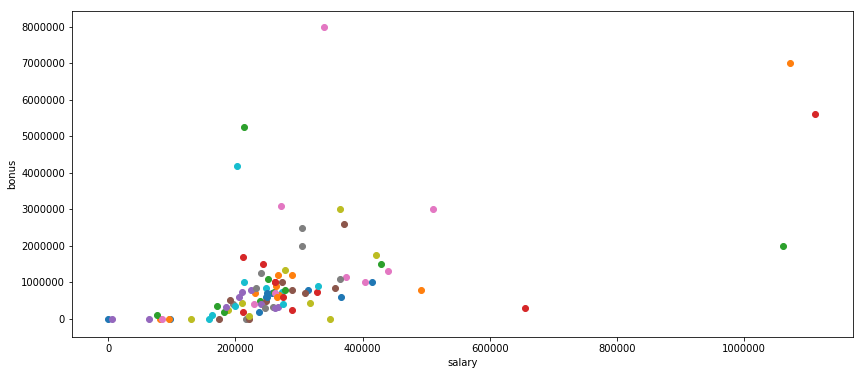

In [15]:
# Copying the original dictionary.
data_dict_clean = data_dict.copy()

# Removing only the TOTAL.
data_dict_clean.pop('TOTAL');

# Defining the features.
features = ["salary", "bonus"]

# Cleaning the data.
data_clean = featureFormat(data_dict_clean, features)

# Plotting the cleaned data.
plot_graphic(data_clean)

In [16]:
# Using the df_keys_bonus_salary to create a list of highest bonus.
df_keys_bonus_salary(data_dict_clean).sort_values(by = ['salary', 'bonus'], ascending=False).head()

,keys,bonus,salary
95,SKILLING JEFFREY K,5600000,1111258
64,LAY KENNETH L,7000000,1072321
127,FREVERT MARK A,2000000,1060932
115,PICKERING MARK R,300000,655037
56,WHALLEY LAWRENCE G,3000000,510364


>**What are the names associated with the current Enron outliers?**

* SKILLING JEFFREY K
* LAY KENNETH L

### Exercise 7 - Remove These Outliers? <a id='part_ii_7'></a>

Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why 
these points are different? (In other words, should they be removed before we, say, try to build a POI identifier?)

>**Do you think these outliers should be cleaned away, or left in as a data point?**

Leave them in, they are valid data points.

# Copying files

In [17]:
# Importing shutil to deal with copy
from shutil import copyfile

# File name
filename = 'outlier.ipynb'

# Lesson
lesson = '08-Lesson_08'

# Directory to make a copy
dir_copy = '../../../ND111-Data Science Foundations II/05-Chapter05/' + lesson + '/00-Mini Project/' + filename

# Copying file.
copyfile(filename, dir_copy)